# PROBLEM EXPLANATION

Stock market is one of the biggest indicators of a country’s economic strength and also one of the best 
investment methods for many person, company and organization. The ability to predict the values in 
stock marketing is everyone’s dream and there are lots of works on that in recent history.
Traditional approaches are often used to estimate stock values.
In this study, price is tried to be predicted with KNN and RandomForest models, both with RSI, MACD, OBV, CCI, MFI, Parabolic sar, BBANDS, Stochastic

# LIBRARIES

In [1]:
import matplotlib
import yfinance as yf
import pandas as pd 
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from warnings import filterwarnings
import seaborn as sns

from sklearn.preprocessing import scale, MinMaxScaler

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

from sklearn import model_selection

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from warnings import filterwarnings

# import optuna

filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (30,10)

import talib as talib
from talib import MA_Type

# DATA PREPERATION

## First dataset (Past values of BTCUSD)

In [2]:
past_vals_df = yf.download(tickers='BTC-USD', start="2012-01-01", end="2021-07-01")

[*********************100%***********************]  1 of 1 completed


### First glance

In [3]:
past_vals_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
past_vals_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2475.0,7.909401e+03,1.194130e+04,1.768970e+02,4.696455e+02,4.389210e+03,9.268349e+03,6.352375e+04
High,2475.0,8.137427e+03,1.231944e+04,2.117310e+02,5.145175e+02,4.591630e+03,9.425056e+03,6.486310e+04
Low,2475.0,7.656494e+03,1.149214e+04,1.715100e+02,4.671600e+02,4.307350e+03,9.112677e+03,6.220896e+04
Close,2475.0,7.922255e+03,1.195066e+04,1.781030e+02,4.998485e+02,4.403740e+03,9.271754e+03,6.350346e+04
Adj Close,2475.0,7.922255e+03,1.195066e+04,1.781030e+02,4.998485e+02,4.403740e+03,9.271754e+03,6.350346e+04
Volume,2475.0,1.289693e+10,1.983732e+10,5.914570e+06,6.930405e+07,4.088420e+09,1.938493e+10,3.509679e+11


In [5]:
past_vals_df.isnull().values.any()

False

### Visualization

<AxesSubplot:title={'center':'BTC values in between 2012-01-01 and 2021-07-01'}, xlabel='Date'>

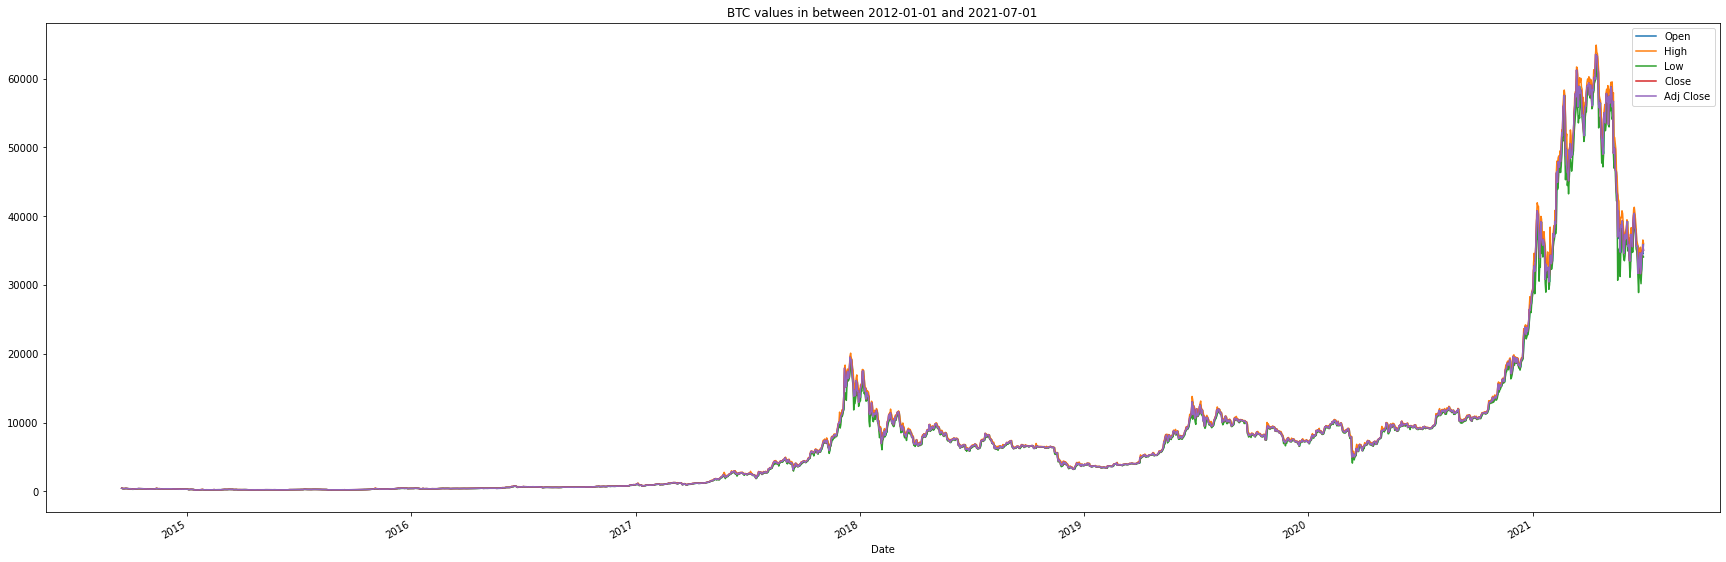

In [6]:
# To visualize the dataset better, drop "Volume"
visual_past_vals_df = past_vals_df.drop(["Volume"], axis = 1)
visual_past_vals_df.plot(title = "BTC values in between 2012-01-01 and 2021-07-01")

## Second dataset (Preperation of technical indicators)

In [7]:
df = past_vals_df.copy()

In [8]:
close = df["Close"]
open = df["Open"]
high = df["High"]
low = df["Low"]
volume = df["Volume"]

In [9]:
# SAR
df["sar_fast"] = talib.SAR(high, low, acceleration = 0.01, maximum = 0.1)

In [10]:
# RSI
rsi_period = 3

rsi = talib.RSI(close, rsi_period)
df["rsi"] = rsi

In [11]:
# MACD
macd_short_period = 12
macd_long_period = 26

macd = talib.MACD(close, macd_short_period, macd_long_period)

df["macd"], df["macd_signal"], df["macd_hist"] = macd

In [12]:
# OBV
df["OBV"] = talib.OBV(close, volume)

In [13]:
# CCI
df["CCI"] = talib.CCI(high, low, close, timeperiod=14)

In [14]:
# MFI
df["MFI"] = talib.MFI(high, low, close, volume, timeperiod=14)

In [15]:
# BBANDS
df["BBANDS_upper"], df["BBANDS_middle"], df["BBANDS_lower"] = talib.BBANDS(close, matype=MA_Type.T3)

In [16]:
# Stochastic
df["STOCH_slow"], df["STOCH_fast"] = talib.STOCH(high, low, close, 3, 5)

In [17]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,sar_fast,rsi,macd,macd_signal,macd_hist,OBV,CCI,MFI,BBANDS_upper,BBANDS_middle,BBANDS_lower,STOCH_slow,STOCH_fast
Date,,,,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,NaN,NaN,NaN,21056800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,468.174011,NaN,NaN,NaN,NaN,-13426400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,467.623311,NaN,NaN,NaN,NaN,-51346100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,465.961485,18.406697,NaN,NaN,NaN,-14482500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,464.332896,15.373135,NaN,NaN,NaN,-41062600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df = df.dropna(axis = 0, how = 'any')
df.head()

,Open,High,Low,Close,Adj Close,Volume,sar_fast,rsi,macd,macd_signal,macd_hist,OBV,CCI,MFI,BBANDS_upper,BBANDS_middle,BBANDS_lower,STOCH_slow,STOCH_fast
Date,,,,,,,,,,,,,,,,,,,
2014-10-20,389.230988,390.084015,378.252014,382.845001,382.845001,16419000,312.274406,35.992269,-6.216836,-14.504225,8.287389,-18663162.0,36.918838,67.275681,399.286622,391.855516,384.424410,46.275493,51.307119
2014-10-21,382.420990,392.645996,380.834015,386.475006,386.475006,14188900,315.257113,51.044367,-5.196584,-12.642697,7.446112,-4474262.0,41.555209,64.905179,397.413363,390.835275,384.257187,51.847875,50.352202
2014-10-22,386.118011,388.575989,382.248993,383.157990,383.157990,11641300,318.150340,38.601933,-4.602627,-11.034683,6.432056,-16115562.0,21.311364,57.863374,396.213402,389.399104,382.584805,51.333238,49.818868
2014-10-23,382.962006,385.048004,356.446991,358.416992,358.416992,26456900,320.956770,10.356795,-6.058464,-10.039439,3.980975,-42572462.0,-109.834971,41.722074,407.161166,384.945749,362.730333,38.144960,47.108691
2014-10-24,358.591003,364.345001,353.304993,358.345001,358.345001,15585700,323.679007,10.323824,-7.135779,-9.458707,2.322928,-58158162.0,-157.946935,45.832680,404.018208,378.632824,353.247439,26.680418,38.719539


## Final data

In [19]:
final_df = pd.DataFrame()
final_df = df.copy()
final_df["Close_shifted"] = df["Close"].shift(-1)
final_df.drop(final_df.index[-1], inplace=True)
final_df.head()

,Open,High,Low,Close,Adj Close,Volume,sar_fast,rsi,macd,macd_signal,macd_hist,OBV,CCI,MFI,BBANDS_upper,BBANDS_middle,BBANDS_lower,STOCH_slow,STOCH_fast,Close_shifted
Date,,,,,,,,,,,,,,,,,,,,
2014-10-20,389.230988,390.084015,378.252014,382.845001,382.845001,16419000,312.274406,35.992269,-6.216836,-14.504225,8.287389,-18663162.0,36.918838,67.275681,399.286622,391.855516,384.424410,46.275493,51.307119,386.475006
2014-10-21,382.420990,392.645996,380.834015,386.475006,386.475006,14188900,315.257113,51.044367,-5.196584,-12.642697,7.446112,-4474262.0,41.555209,64.905179,397.413363,390.835275,384.257187,51.847875,50.352202,383.157990
2014-10-22,386.118011,388.575989,382.248993,383.157990,383.157990,11641300,318.150340,38.601933,-4.602627,-11.034683,6.432056,-16115562.0,21.311364,57.863374,396.213402,389.399104,382.584805,51.333238,49.818868,358.416992
2014-10-23,382.962006,385.048004,356.446991,358.416992,358.416992,26456900,320.956770,10.356795,-6.058464,-10.039439,3.980975,-42572462.0,-109.834971,41.722074,407.161166,384.945749,362.730333,38.144960,47.108691,358.345001
2014-10-24,358.591003,364.345001,353.304993,358.345001,358.345001,15585700,323.679007,10.323824,-7.135779,-9.458707,2.322928,-58158162.0,-157.946935,45.832680,404.018208,378.632824,353.247439,26.680418,38.719539,347.270996


<AxesSubplot:>

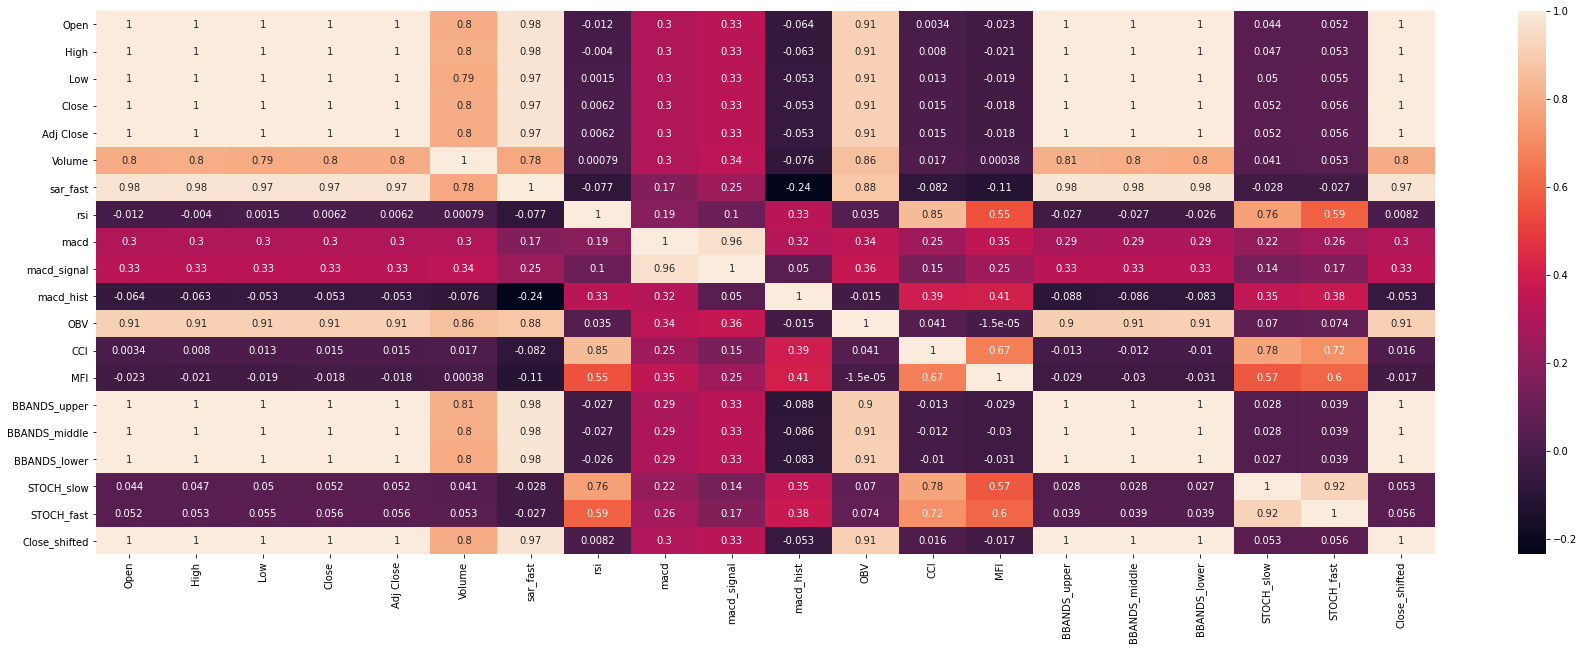

In [20]:
corr = final_df.corr()
sns.heatmap(corr, annot = True)

In [21]:
col_list = ["STOCH_fast", "STOCH_slow", "MFI", "CCI", "macd_hist", "rsi", "BBANDS_upper", "BBANDS_lower","macd", "macd_signal"]
final_df.drop(col_list, axis = 1, inplace = True)
final_df.head()

,Open,High,Low,Close,Adj Close,Volume,sar_fast,OBV,BBANDS_middle,Close_shifted
Date,,,,,,,,,,
2014-10-20,389.230988,390.084015,378.252014,382.845001,382.845001,16419000,312.274406,-18663162.0,391.855516,386.475006
2014-10-21,382.420990,392.645996,380.834015,386.475006,386.475006,14188900,315.257113,-4474262.0,390.835275,383.157990
2014-10-22,386.118011,388.575989,382.248993,383.157990,383.157990,11641300,318.150340,-16115562.0,389.399104,358.416992
2014-10-23,382.962006,385.048004,356.446991,358.416992,358.416992,26456900,320.956770,-42572462.0,384.945749,358.345001
2014-10-24,358.591003,364.345001,353.304993,358.345001,358.345001,15585700,323.679007,-58158162.0,378.632824,347.270996


In [22]:
scaler = MinMaxScaler()

final_scaled = scaler.fit_transform(final_df)
col_names = ["Open", "High", "Low", "Close", "Adj Close", "Volume", "sar_fast", "OBV", "BBANDS_middle", "Close_shifted"]
final_df_scaled = pd.DataFrame(final_scaled, columns = col_names)
final_df_scaled.head()

# unscaled = scaler.inverse_transform(scaled_final)
# unscaled_df = pd.DataFrame(unscaled)

,Open,High,Low,Close,Adj Close,Volume,sar_fast,OBV,BBANDS_middle,Close_shifted
0,0.003352,0.002759,0.003333,0.003233,0.003233,0.000028,0.002176,0.000121,0.003071,0.003290
1,0.003244,0.002798,0.003374,0.003290,0.003290,0.000022,0.002222,0.000127,0.003055,0.003238
2,0.003303,0.002735,0.003397,0.003238,0.003238,0.000015,0.002267,0.000122,0.003032,0.002847
3,0.003253,0.002681,0.002981,0.002847,0.002847,0.000057,0.002310,0.000112,0.002960,0.002846
4,0.002868,0.002361,0.002930,0.002846,0.002846,0.000026,0.002352,0.000106,0.002859,0.002671


# MODEL TRAINING

## Arranging X and Y datasets

In [23]:
y = final_df["Close_shifted"]
X_ = final_df.drop(["Close_shifted"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size = 0.25, random_state = 123)

In [24]:
y_scaled = final_df_scaled["Close_shifted"]
X_scaled = final_df_scaled.drop(["Close_shifted"], axis = 1)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size = 0.25, random_state = 123)

## KNN - unscaled

In [25]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [26]:
knn_model.n_neighbors

5

### PREDICTTION AND SUCCESS METRICS

In [27]:
y_pred_knn = knn_model.predict(X_test)
y_pred_knn[0:5]

array([309.49160156, 266.77739563, 393.64180298, 614.12440186,
       239.70239868])

In [28]:
scala = final_df["Close"].max() - final_df["Close"].min()
print("In the interval", scala, ", performance metrics are as follows")
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_knn)))
print("MSE: ", mean_squared_error(y_test, y_pred_knn))
print("MAE: ", mean_absolute_error(y_test, y_pred_knn))

In the interval 63325.35403442383 , performance metrics are as follows
RMSE:  2830.570750644977
MSE:  8012130.77440687
MAE:  1111.2569198683318


### RESULT VISUALIZATION

<AxesSubplot:title={'center':'Real Close values as y_test ; Close predictions with knn as y_pred_knn'}>

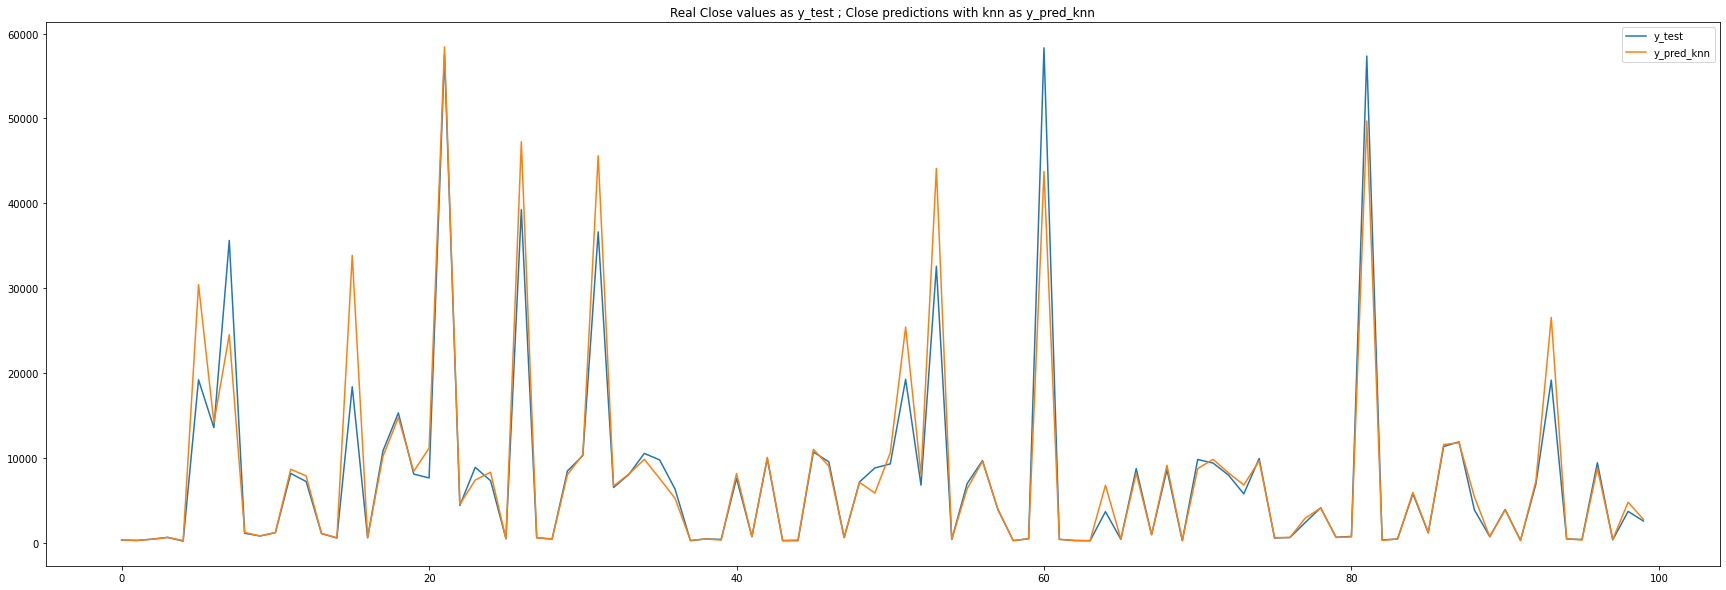

In [29]:
list_of_tuples = list(zip(y_test, y_pred_knn))
knn_res_df = pd.DataFrame(list_of_tuples, columns = ['y_test', 'y_pred_knn'])
knn_res_df[:100].plot(title ="Real Close values as y_test ; Close predictions with knn as y_pred_knn")

## KNN - scaled

In [30]:
knn_model_scaled = KNeighborsRegressor()
knn_model_scaled.fit(X_train_scaled, y_train_scaled)

KNeighborsRegressor()

In [31]:
knn_model_scaled.n_neighbors

5

### Prediction & Performance Metrics

In [32]:
y_pred_knn_scaled = knn_model_scaled.predict(X_test)
y_pred_knn_scaled[0:5]

array([7.09284072e-01, 6.62220885e-01, 8.13416460e-01, 7.94675447e-01,
       6.67975762e-04])

In [33]:
scala = final_df_scaled["Close"].max() - final_df_scaled["Close"].min()
print("In the interval", scala, ", performance metrics are as follows")
print("RMSE: ", np.sqrt(mean_squared_error(y_test_scaled, y_pred_knn_scaled)))
print("MSE: ", mean_squared_error(y_test_scaled, y_pred_knn_scaled))
print("MAE: ", mean_absolute_error(y_test_scaled, y_pred_knn_scaled))

In the interval 1.0 , performance metrics are as follows
RMSE:  0.6530463254269843
MSE:  0.4264695031536867
MAE:  0.6056967994608635


### Result Visualization

<AxesSubplot:title={'center':'Real Close values as y_test_scaled ; Close predictions with knn as y_pred_knn_scaled'}>

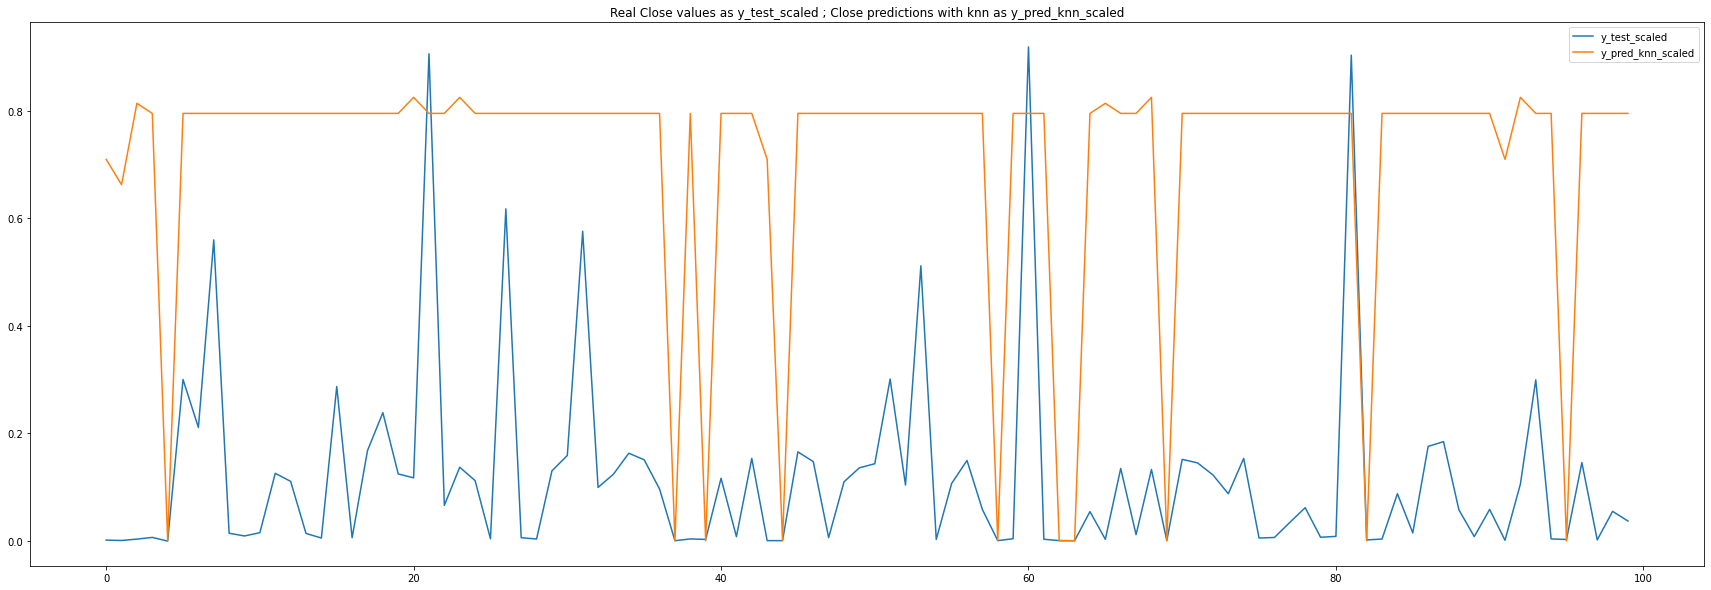

In [34]:
list_of_tuples = list(zip(y_test_scaled, y_pred_knn_scaled))
knn_res_df = pd.DataFrame(list_of_tuples, columns = ['y_test_scaled', 'y_pred_knn_scaled'])
knn_res_df[:100].plot(title ="Real Close values as y_test_scaled ; Close predictions with knn as y_pred_knn_scaled")

## RF - unscaled

In [35]:
rf_model =  RandomForestRegressor(random_state = 123)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

### PREDICTION & SUCCESS METRICS

In [36]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf[0:5]

array([284.54779999, 247.36315063, 407.16008789, 611.0610083 ,
       225.45332138])

In [37]:
scala = final_df["Close"].max() - final_df["Close"].min()
print("In the interval", scala, ", performance metrics are as follows")
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("MSE: ", mean_squared_error(y_test, y_pred_rf))
print("MAE: ", mean_absolute_error(y_test, y_pred_rf))

In the interval 63325.35403442383 , performance metrics are as follows
RMSE:  558.2333041412658
MSE:  311624.4218524749
MAE:  249.48357336540658


### RESULT VISUALIZATION

<AxesSubplot:title={'center':'Real Close values as y_test ; Close predictions with randomForest as y_pred_rf'}>

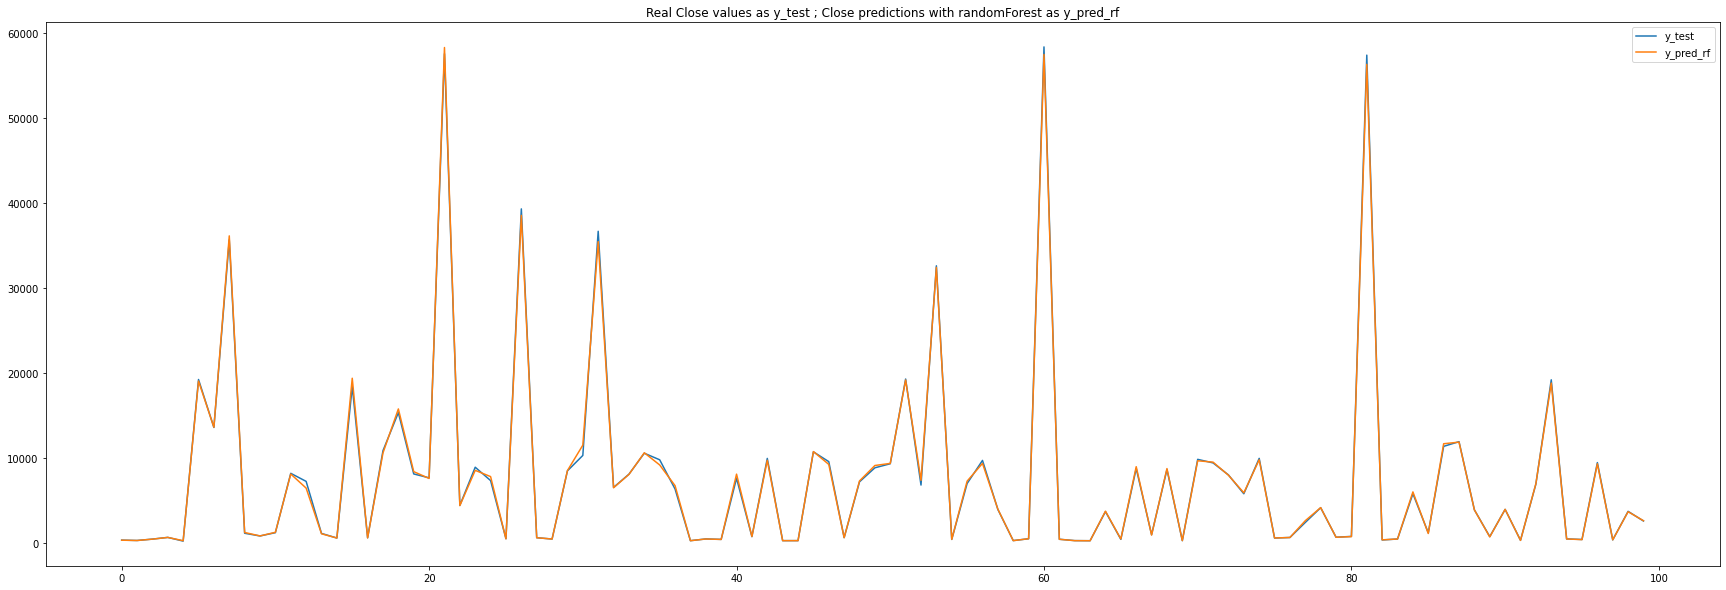

In [38]:
list_of_tuples = list(zip(y_test, y_pred_rf))
rf_res_df = pd.DataFrame(list_of_tuples, columns = ['y_test', 'y_pred_rf'])
rf_res_df[:100].plot(title ="Real Close values as y_test ; Close predictions with randomForest as y_pred_rf")

Text(0.5, 0, 'Importance of variables when predicting BTC close values 1 period after from now')

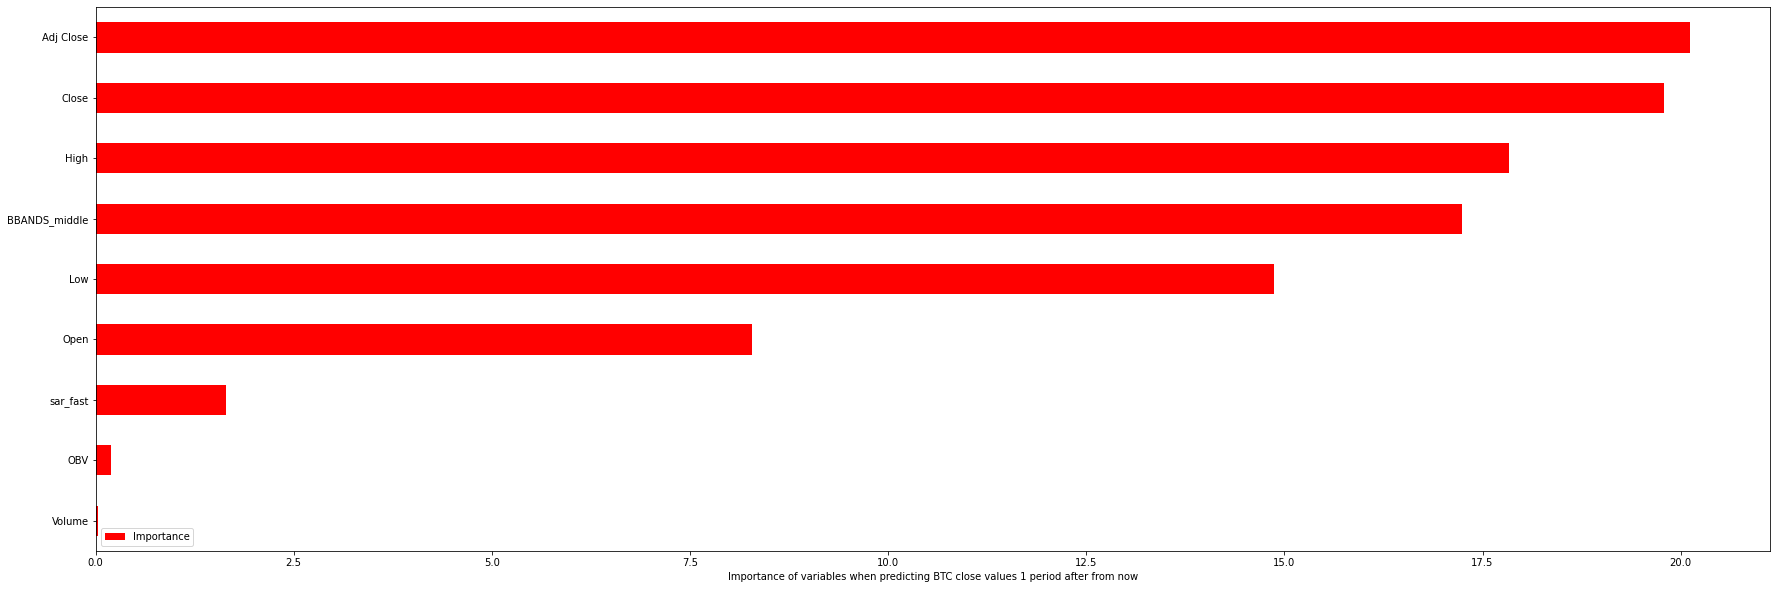

In [39]:
# Variable importance levels (percentage)
Importance = pd.DataFrame({"Importance": rf_model.feature_importances_ * 100},
                            index = X_train.columns)
Importance.sort_values(by = "Importance", axis = 0, ascending = True).plot(kind = "barh",
color = "r")

plt.xlabel("Importance of variables when predicting BTC close values 1 period after from now")

# MODEL SELECTION

In [40]:
knn_model_rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
knn_model_mae = mean_absolute_error(y_test, y_pred_knn)

knn_model_scaled_rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn_scaled))
knn_model_scaled_mae = mean_absolute_error(y_test, y_pred_knn_scaled)

rf_model_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_model_mae = mean_absolute_error(y_test, y_pred_rf)

In [41]:
cmp_dic = {"knn_model": [knn_model_rmse, knn_model_mae],
            "knn_model_scaled": [knn_model_scaled_rmse, knn_model_scaled_mae],
            "rf_model": [rf_model_rmse, rf_model_mae]}  

cmp_df = pd.DataFrame(cmp_dic, index = ["rmse", "mae"])
cmp_df

,knn_model,knn_model_scaled,rf_model
rmse,2830.570751,14158.135726,558.233304
mae,1111.256920,8032.038241,249.483573


# MODEL OPTIMIZATION

In [42]:
col_list = ["Volume", "OBV", "sar_fast"]
final_df.drop(col_list, axis = 1, inplace = True)

In [43]:
rf_params = {"max_depth": list(range(1, 10)),
                "max_features": [3, 5, 10, 15],
                "n_estimators": [100, 200, 500, 1000, 2000]}

In [44]:
rf_model = RandomForestRegressor(random_state = 123)
rf_cv_model = GridSearchCV(rf_model, rf_params, cv =  10, n_jobs = -1)

In [46]:
# rf_cv_model.fit(X_train, y_train)

In [47]:
# rf_cv_model.best_params_

In [48]:
rf_tuned = RandomForestRegressor(max_depth = 7, max_features = 3, n_estimators = 500)

In [49]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, max_features=3, n_estimators=500)

In [50]:
y_pred_rf_tuned = rf_tuned.predict(X_test)

# MODEL EVALUATION

In [51]:
scala = final_df["Close"].max() - final_df["Close"].min()
print("In the interval", scala, " performance metrics are as follows")
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned)))
print("MSE: ", mean_squared_error(y_test, y_pred_rf_tuned))
print("MAE: ", mean_absolute_error(y_test, y_pred_rf_tuned))

In the interval 63325.35403442383  performance metrics are as follows
RMSE:  530.4961032694955
MSE:  281426.1155841192
MAE:  239.3565590388033


Text(0.5, 0, 'Importance of variables when predicting BTC close values 1 period after from now')

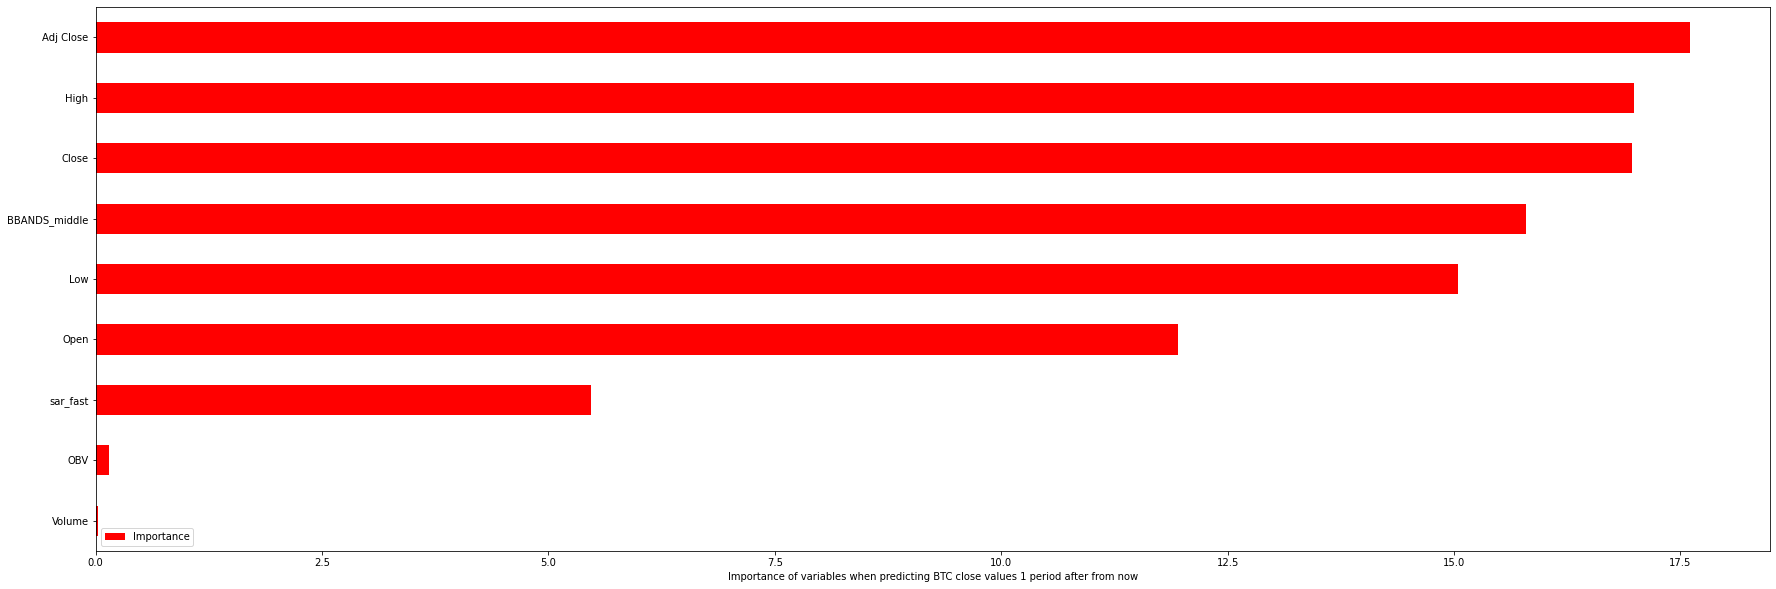

In [52]:
# Variable importance levels (percentage)
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_ * 100},
                            index = X_train.columns)
Importance.sort_values(by = "Importance", axis = 0, ascending = True).plot(kind = "barh",
color = "r")

plt.xlabel("Importance of variables when predicting BTC close values 1 period after from now")